In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = pd.read_csv("C:\\Users\\HP\\Downloads\\CarPrices\\CarPrice_Assignment.csv")
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
x.drop(['car_ID','CarName'], axis=1, inplace = True)

In [4]:
x['fueltype'] = x['fueltype'].apply(lambda i: 0 if i == "gas" else 1)
x['doornumber'] = x['doornumber'].apply(lambda i:0 if i=="two" else 1)
x['aspiration'] = x['aspiration'].apply(lambda i:0 if i=="std" else 1)
x['drivewheel'] = x['drivewheel'].apply(lambda i: 0 if i == "rwd" else (1 if i == "fwd" else 2))
for index, value in x['carbody'].items():
    if value == "convertible":
        x.at[index, 'carbody'] = 0
    elif value == "hatchback":
        x.at[index, 'carbody'] = 1
    elif value == "sedan":
        x.at[index, 'carbody'] = 2
    elif value == "wagon":
        x.at[index, 'carbody'] = 3
    elif value == "hardtop":
        x.at[index, 'carbody'] = 4
x['enginelocation'] = x['enginelocation'].apply(lambda i:0 if i=="front" else 1)
for index, value in x['fuelsystem'].items():
    if value == "mpfi":
        x.at[index, 'fuelsystem'] = 0
    elif value == "2bbl":
        x.at[index, 'fuelsystem'] = 1
    elif value == "mfi":
        x.at[index, 'fuelsystem'] = 2
    elif value == "1bbl":
        x.at[index, 'fuelsystem'] = 3
    elif value == "spfi":
        x.at[index, 'fuelsystem'] = 4
    elif value == "4bbl":
         x.at[index, 'fuelsystem'] = 5
    elif value == "idi":
         x.at[index, 'fuelsystem'] = 6
    elif value == "spdi":
         x.at[index, 'fuelsystem'] = 7
        

In [5]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,1,2,0,0,109.1,188.8,68.9,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,0,1,1,2,0,0,109.1,188.8,68.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,0,1,2,0,0,109.1,188.8,68.9,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,1,1,2,0,0,109.1,188.8,68.9,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
numeric_x = x.select_dtypes(include=['number'])

# # Calculate the correlation matrix
corr_mat = numeric_x.corr()
corr_mat

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.194311,-0.059866,-0.664073,0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.194311,1.000000,0.401397,0.191491,-0.132257,-0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.401397,1.000000,0.031792,-0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,0.108217,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.191491,0.031792,1.000000,0.098954,-0.137757,0.447357,0.398568,0.207168,0.552208,0.197379,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
drivewheel,0.041671,-0.132257,-0.066465,0.098954,1.000000,-0.147865,-0.459745,-0.485649,-0.470751,0.019719,-0.575111,-0.524307,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.212471,-0.040070,-0.057191,-0.137757,-0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.196826,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.308346,0.257611,0.447357,-0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.212679,0.234539,0.398568,-0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.233880,0.300567,0.207168,-0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.284631,0.087311,0.552208,0.019719,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336


<Axes: >

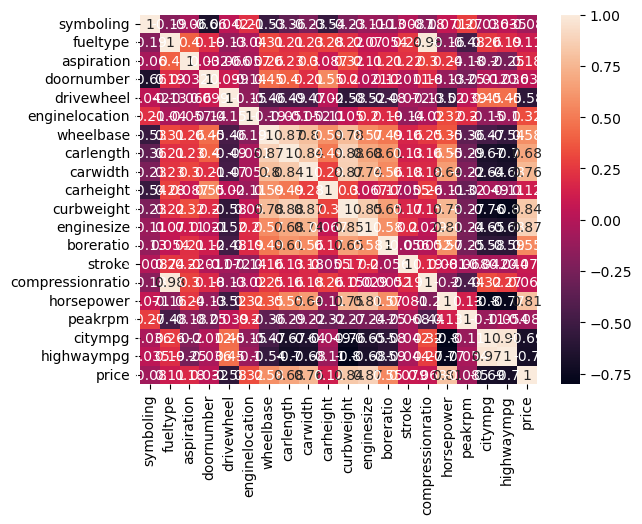

In [9]:
import seaborn as sns
sns.heatmap(corr_mat, annot=True) #symboling, peakrpm, citympg, highwaympg

In [10]:
x = x.drop(['symboling', 'drivewheel','peakrpm', 'citympg', 'highwaympg'],axis=1)

In [12]:
y = x['price']
y = y.values.reshape(-1,1)
x.drop(['price'], axis=1, inplace=True)

In [13]:
numeric_x = x.select_dtypes(include=['number'])

# Standardize the numeric data
x = (numeric_x - numeric_x.mean(axis=0)) / numeric_x.std(axis=0)
print(x)
# x = (x-x.mean(axis=0))/x.std(axis=0)
y = (y-y.mean(axis=0))/y.std(axis=0)

x = np.hstack((x, np.ones((x.shape[0],1))))

     fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0   -0.327995   -0.468149   -1.127628       -0.121569  -1.686643  -0.425480   
1   -0.327995   -0.468149   -1.127628       -0.121569  -1.686643  -0.425480   
2   -0.327995   -0.468149   -1.127628       -0.121569  -0.706865  -0.230948   
3   -0.327995   -0.468149    0.882491       -0.121569   0.173274   0.206750   
4   -0.327995   -0.468149    0.882491       -0.121569   0.106848   0.206750   
..        ...         ...         ...             ...        ...        ...   
200 -0.327995   -0.468149    0.882491       -0.121569   1.717669   1.195622   
201 -0.327995    2.125651    0.882491       -0.121569   1.717669   1.195622   
202 -0.327995   -0.468149    0.882491       -0.121569   1.717669   1.195622   
203  3.033954    2.125651    0.882491       -0.121569   1.717669   1.195622   
204 -0.327995    2.125651    0.882491       -0.121569   1.717669   1.195622   

     carwidth  carheight  curbweight  enginesize  b

In [15]:
print("The shape of the independent fatures are ",x.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (205, 15)
The shape of the dependent fatures are  (205, 1)


In [16]:
ratio = 0.80
total_rows = x.shape[0]
train_size = int(total_rows*ratio)
x_train = x[0:train_size]
x_test = x[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

In [17]:
def cost_function(x, y, w):
    predictions = np.dot(x, w)
    errors = predictions - y
    return (1 / (2 * len(y))) * np.sum((predictions-y)**2)

In [18]:
def gradient_descent(x, y, lr, iter):
    m = len(y)
    cost_history = np.zeros(iter)
    w = np.zeros((x.shape[1], 1))
    
    for i in range(iter):
        predictions = np.dot(x, w)
        errors = predictions - y
        
        if np.any(np.isnan(predictions)) or np.any(np.isnan(errors)):
            print("NaN detected in predictions or errors at iteration:", i)
            break

        gradients = (1 / m) * np.dot(x.T, errors)
        w = w - lr * gradients
        
        cost = cost_function(x, y, w)
        cost_history[i] = cost

        if np.isnan(cost):
            print("NaN detected in cost at iteration:", i)
            break

    return w, cost_history

In [19]:
iteration = 500
learning_rate = 0.1
weig, cost_history = gradient_descent(x_train, y_train, learning_rate, iteration)
print("Cost finally: ",cost_history[-1])

Cost finally:  0.06672166413404489


In [20]:
print(y[78])

[-0.82914114]


In [21]:
print(np.dot(x,weig)[78])

[-0.7296719]


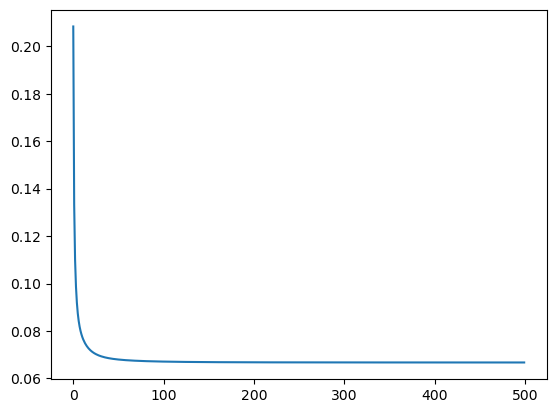

In [22]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_history)
plt.show()

In [23]:
y_pred = np.dot(x_test, weig)

In [24]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.3270825403147475
Mean Squared Error (MSE): 0.17461208870282988
Root Mean Squared Error (RMSE): 0.41786611336985663
R-squared (R²): 0.3837180122509646
